# Python基础2

## 08列表推导式

循环可以用来生成列表：

In [1]:
values = [2, 2, 3]
squares = []
for x in values:
    squares.append(x ** 2)
print(squares)  # [4, 4, 9]

[4, 4, 9]


列表推导式可以使用更简单的方法来创建这个列表：

In [2]:
values = [3, 8, 10, 14]
squares = [x ** 2 for x in values]
print(squares)  # [9, 64, 100, 196]

[9, 64, 100, 196]


可以加入条件筛选

例如，只想保留列表中不大于8的数的平方：

In [3]:
squares = [x ** 2 for x in values if x <= 10]
print(squares)  # [9, 64, 100]

[9, 64, 100]


平方的结果不大于100的：

In [4]:
squares = [x ** 2 for x in values if x ** 2 <= 80]
print(squares)  # [9, 64]

[9, 64]


使用推导式生成集合和字典：

In [5]:
values = [10, 21, 4, 7, 12]
square_set = {x ** 2 for x in values if x <= 10}

print(square_set)  # set([16, 49, 100])

{16, 49, 100}


In [6]:
square_dict = {x: x ** 2 for x in values if x <= 10}
print(square_dict)  # {10: 100, 4: 16, 7: 49}

{10: 100, 4: 16, 7: 49}


计算上面例子中生成的列表中所有元素的和：

In [7]:
total = sum([x ** 2 for x in values if x < 10])
total  # 65

65

但是，Python会生成这个列表，然后在将它放到垃圾回收机制中（因为没有变量指向它），

这毫无疑问是种浪费。

为了解决这种问题，与range()类似，Python使用产生式表达式来解决这个问题：

In [8]:
total = sum(x ** 2 for x in values if x < 10)
total  # 65

65

与上面相比，只是去掉了括号，但这里并不会一次性的生成这个列表。

## 09函数

### 定义函数

在Python中可以使用 def 关键字来定义函数，程序中函数的参数就相当于是数学上说的函数的自变量，可以通过 return 关键字来返回一个值，这相当于数学上说的函数的因变量。

In [9]:
def add(a, b):
    """
    add two nums
    :param a: first num
    :param b: second num
    :return: result
    """
    c = a + b
    return c

### 使用函数

使用函数时，只需要将参数换成特定的值传给函数。

In [10]:
# Python并没有限定参数的类型，因此可以使用不同的参数类型：
print(add(2, 3))

print(add('foo', 'bar'))  # foobar

5
foobar


传入参数时，Python提供了两种选项，

第一种是上面使用的按照位置传入参数，

另一种则是使用关键词模式，显式地指定参数的值：

In [11]:
add(a=2, b=3)

5

In [12]:
add(b='morning', a='good')

'goodmorning'

In [13]:
add(2, b=3)  # 5

5

### 设定默认参数

In [14]:
def quad(x, a=1, b=0, c=0):
    return a * x * x + b * x + c

In [15]:
quad(2.0)

4.0

In [16]:
quad(2.0, b=3)

10.0

### 接收不定参数

使用如下方法，可以使函数接受不定数目的参数

In [17]:
def add(x, *args):
    total = x
    for arg in args:
        total += arg
    return total

*args 表示参数数目不定，可以看成一个元组，

把第一个参数后面的参数当作元组中的元素。

In [18]:
print(add(1, 2, 3, 4, 5))  # 15
print(add(1, 2))  # 3

15
3


### 使用关键词传入参数

In [19]:
def add(x, **kwargs):
    total = x
    for arg, val in kwargs.items():
        print("adding ", arg)
        total += val
    return total

**kwargs 表示参数数目不定，相当于一个字典，关键词和值对应于键值对。

In [20]:
add(1, a=2, b=3)  # 6

adding  a
adding  b


6

In [21]:
# 可以接收任意数目的位置参数和键值对参数：
def fun1(*args, **kwargs):
    print(args, kwargs)
    
fun1(2, 3, a="bar", b=10)  # (2, 3) {'a': u'bar', 'b': 10}

(2, 3) {'a': 'bar', 'b': 10}


### 返回多个值

In [22]:
# 函数可以返回多个值：
def to_val(x, y):
    r = (x ** 2 + y ** 2) ** 0.5
    total = x + y
    return r, total

In [23]:
a, b = to_val(3, 4)
print(a, b)  # 5.0 7

5.0 7


In [24]:
# 事实上，Python将返回的两个值变成了元组：
print(to_val(3, 4))  # (5.0, 7)

(5.0, 7)


In [25]:
# 列表也有相似的功能,可以用来赋值：
a, b, c = [1, 2, 3]
print(a, b, c)

1 2 3


In [26]:
a, _ = to_val(6, 8)
print(a)  # 10.0

10.0


In [27]:
# 可以将参数用元组传入：
def add(a, b):
    return a + b

c = (2, 3)
print(add(*c))  # 5
# 这里的*必须要。

5


In [28]:
# 还可以用字典传入参数：
d = {'a': 2, 'b': 5}
print(add(**d))  # 7

7


### map 方法生成序列

map函数

map() 会根据提供的函数对指定序列做映射。

map(aFun, aSeq)

In [29]:
def sqr(x):
    return x ** 2

In [30]:
a = [2, 3, 4]
result = map(sqr, a)  # [4,9,16]
type(result)

map

In [31]:
# map返回的是个迭代器对象, 可以转化为list显示

list(result)

[4, 9, 16]

事实上，根据函数参数的多少，map 可以接受多组序列， 将其对应的元素作为参数传入函数：

In [32]:
def add(a, b):
    return a + b

a = [2, 3, 4]
list(map(sqr, a))  # [4,9,16]
[4, 9, 16]

[4, 9, 16]

In [33]:
a = (2, 3, 4)
b = [10, 11, 15]
list(map(add, a, b))  # [12, 14, 19]

[12, 14, 19]

## 10模块

用模块管理函数，Python中每个文件就代表了一个模块（module），

Python会将所有 .py 结尾的文件认定为Python代码文件。

在使用函数的时候我们通过import关键字导入指定的模块：

`module1.py`

```python

def foo():
    print('hello, world!')

```
`module2.py`

```python
def foo():
    print('goodbye, world!')
```
`test.py`

```python
from module1 import foo

# 输出hello, world!
foo()

from module2 import foo

# 输出goodbye, world!
foo()
```

打开pycharm，在当前目录下尝试上面的代码

### name 属性

有时候我们想将一个 `.py` 文件既当作脚本，又能当作模块用， 这个时候可以使用 `name `这个属性。

```python
PI = 3.14


def get_sum(lst):
    """
    Sum the values in the list
    :param lst:
    :return:
    """
    total = 0
    for v in lst:
        total = total + v
    return total

if __name__ == '__main__':
    print(PI)
    print(get_sum([1,2,3,4]))
```
上文保存为`ex.py`

使用`with open('ex.py', 'w')`的方式直接创建该代码文件

In [34]:
with open('ex.py', 'w') as f:
    f.write("""
PI = 3.14
def get_sum(lst):
    total = 0
    for v in lst:
        total = total + v
    return total
    
if __name__ == '__main__':
    print(PI)
    print(get_sum([1,2,3,4]))
    """)

In [35]:
from ex import PI, get_sum  # from ex import *

print(PI)  # 3.14
print(get_sum([2, 3]))  # 5

# 可以使用 * 导入所有变量, 不提倡，因为可能覆盖一些已有的函数

3.14
5


In [36]:
# 删除文件：
import os

os.remove('ex.py')

## 11文件

### 写文件 

我们使用 open 函数的写入模式来写文件：

In [37]:
f = open('test.txt', 'w')
f.write('hello world.')
f.close()

In [38]:
print(open('test.txt').read())

hello world.


使用 'w' 模式时，如果文件不存在会被创建

除了写入模式，还有追加模式 'a'

读写模式'w+''

### 读文件

使用 open 函数 来读文件，使用文件名的字符串作为输入参数：

默认打开文件是 ‘r’ 读模式

In [39]:
f = open("test.txt")

# 默认以读的方式打开文件，如果文件不存在会报错。
# 可以使用 read 方法来读入文件中的所有内容：
text = f.read()
print(text)

hello world.


按照行读入内容，readlines 方法返回一个列表，每个元素代表文件中每一行的内容：

In [40]:
f = open("test.txt")
lines = f.readlines()
print(lines)
f.close()

['hello world.']


In [41]:
# 事实上，我们可以将 f 放在一个循环中，得到它每一行的内容：
f = open('test.txt')
for line in f:
    print(line)
f.close()

hello world.


### 二进制文件

二进制读写模式 b：

In [42]:
import os

f = open('binary.bin', 'wb')
f.write(os.urandom(10))
f.close()

In [43]:
f = open('binary.bin', 'rb')
print(repr(f.read()))
f.close()

b"\xe5Z\xd6T\xe8h\xea\x15\xf3'"


### with 方法
事实上，Python提供了更安全的方法，当 with 块的内容结束后， Python会自动调用它的close 方法，确保读写的安全：

In [44]:
with open('new_file.txt', 'w') as f:
    for i in range(3000):
        x = 1.0 / (i - 1000)
        f.write('hello world: ' + str(i) + '\n')

ZeroDivisionError: float division by zero

查看文件写的结果，虽然触发error，但已经写的内容是成功的。

In [45]:
# 删除文件：
import os
os.remove('test.txt')
os.remove('binary.bin')
os.remove('new_file.txt')

## 12异常

### try & except 块

捕捉不同的错误类型，尝试在下面输入框输入：-1，1，2，q

In [46]:
import math

while True:
    try:
        text = input('>')
        if text[0] == 'q':
            break
        x = float(text)
        y = 1 / math.log10(x)
        print("1/log10({0}) = {1}".format(x, y))
    except ValueError:
        print("value must bigger than 0")
    except ZeroDivisionError:
        print("the value must not be 1")

>1
the value must not be 1
>q


自定义异常

异常是标准库中的类，这意味着我们可以自定义异常类：  
尝试在文本输入框输入：k，start，q

In [47]:
class CommandError(ValueError):
    print("bad command operation. must input 'start', 'stop', 'pause'")
    


valid_commands = {'start', 'stop', 'pause'}
while True:
    command = input('>')
    if command == 'q':
        break
    try:
        if command.lower() not in valid_commands:
            raise CommandError('Invalid command: %s' % command)
        print('input command:', command)
    except CommandError:
        print("bad command string: %s" % command)

bad command operation. must input 'start', 'stop', 'pause'
>start
input command: start
>q


### finally

try/catch 块还有一个可选的关键词 finally。  
不管 try 块有没有异常， finally 块的内容总是会被执行， 而且会在抛出异常前执行，因此可以用来作为安全保证，  
比如文件操作时，常在finally关闭文件。

In [48]:
try:
    print(1 / 0)
except ZeroDivisionError:
    print('divide by 0.')
finally:
    print('finally was called.')

divide by 0.
finally was called.


## 13面对对象编程 

面向对象编程——Object Oriented Programming，简称OOP，是一种程序设计思想。OOP把对象作为程序的基本单元，一个对象包含了数据和操作数据的函数。

在Python中，所有数据类型都可以视为对象，当然也可以自定义对象。自定义的对象数据类型就是面向对象中的类（Class）的概念。

### 类（Class）和实例（Instance）

面向对象的设计思想是从自然界中来的，因为在自然界中，类（Class）和实例（Instance）的概念是很自然的。Class是一种抽象概念，比如我们定义的Class——Student，是指学生这个概念，而实例（Instance）则是一个个具体的Student，比如，张三和李四是两个具体的Student。

所以，面向对象的设计思想是抽象出Class，根据Class创建Instance。

面向对象的抽象程度又比函数要高，因为一个Class既包含数据，又包含操作数据的方法。

### 创建类

类的特殊方法
Python 使用 __ 开头的名字来定义特殊的方法和属性，它们有：
```python
__init__()  
__repr__()  
__str__()  
__call__()  
__iter__()  
__add__()  
__sub__()  
__mul__()  
__rmul__()  
__class__  
__name__  
```
构造方法 `__init__()  `

在产生对象之后，我们可以向对象中添加属性。 事实上，还可以通过构造方法，在构造对象的时候直接添加属性：

In [49]:
class Clothes(object):
    """
    init_demo
    """

    def __init__(self, color="green"):
        self.color = color


my_clothes = Clothes()
my_clothes.color

'green'

传入有参数的值：

In [50]:
your_clothes = Clothes('orange')
your_clothes.color

'orange'

表示方法 `__repr__()` 和 `__str__()`:

In [51]:
class Clothes(object):
    """
    repr and str demo
    """

    def __init__(self, color="green"):
        self.color = color

    def __str__(self):
        "This is a string to print."
        return ("a {} clothes".format(self.color))

    def __repr__(self):
        "This string recreates the object."
        return ("{}(color='{}')".format(self.__class__.__name__, self.color))

`__str__() `是使用 print 函数显示的结果,类似java中的toString：

In [52]:
my_clothes = Clothes()
print(my_clothes)

a green clothes


`__repr__()` 返回的是不使用 print 方法的结果:

In [53]:
my_clothes

Clothes(color='green')

In [54]:
print(my_clothes.__class__, my_clothes.__class__.__name__, my_clothes.color)

<class '__main__.Clothes'> Clothes green


In [55]:
my_clothes.__class__, my_clothes.__class__.__name__, my_clothes.color

(__main__.Clothes, 'Clothes', 'green')

### 类的属性

只读属性：

In [56]:
class Clothes(object):
    def __init__(self, price):
        self.price = price

    # 这样 discount_price 就变成属性了
    @property
    def discount_price(self):
        return self.price * 0.8

这里 discount_price 就是一个只读不写的属性了（注意是属性不是方法）, 而price是可读写的属性：

In [57]:
my_clothes = Clothes(100)
print(my_clothes.discount_price)  # 80.0

80.0


可以修改price属性来改变discount_price：

In [58]:
my_clothes.price = 200
print(my_clothes.discount_price)  # 160.0

160.0


In [59]:
my_clothes.discount_price()

TypeError: 'float' object is not callable

In [60]:
my_clothes.discount_price=100

AttributeError: can't set attribute

`my_clothes.discount_price()`会报错，因为 my_clothes.discount_price 是属性，不是方法；

`my_clothes.discount_price=100 `也会报错，因为只读。

对于 `@property `生成的只读属性，我们可以使用相应的` @attr.setter` 修饰符来使得这个属性变成可写的：

In [61]:
class Clothes(object):
    def __init__(self, price):
        self.price = price

    # 这样就变成属性了
    @property
    def discount_price(self):
        return self.price * 0.8

    @discount_price.setter
    def discount_price(self, new_price):
        self.price = new_price * 1.25

In [62]:
my_clothes = Clothes(100)
print(my_clothes.discount_price)

my_clothes.price = 200
print(my_clothes.discount_price)
# 修改 discount_price 属性：
my_clothes.discount_price = 180
print(my_clothes.price)
print(my_clothes.discount_price)

80.0
160.0
225.0
180.0


### 继承

类定义的基本形式：
```python
class ClassName(ParentClass):
    """class docstring"""
    def method(self):
        return
```
里面的 ParentClass 就是用来继承的。

例如，dog这个类会 '叫'，hound继承自dog，因此无需定义，hound自然也会 '叫'

In [63]:
class Clothes(object):
    def __init__(self, color="green"):
        self.color = color

    def out_print(self):
        return self.__class__.__name__, self.color

In [64]:
my_clothes = Clothes()
my_clothes.color

'green'

In [65]:
my_clothes.out_print()

('Clothes', 'green')

定义一个子类，继承父类的所有方法:

In [66]:
class NikeClothes(Clothes):
    def change_color(self):
        if self.color == "green":
            self.color = "red"

继承父类的所有方法：

In [67]:
your_clothes = NikeClothes()
your_clothes.color

'green'

In [68]:
your_clothes.out_print()

('NikeClothes', 'green')

但有自己的方法：

In [69]:
your_clothes.change_color()
your_clothes.color

'red'

如果想对父类的方法进行修改，只需要在子类中重定义这个类即可：

In [70]:
class LiningClothes(Clothes):
    def change_color(self):
        if self.color == "green":
            self.color = "white"

    def out_print(self):
        self.change_color()
        return self.__class__.__name__, self.color


him_clothes = LiningClothes()
print(him_clothes.color)

him_clothes.change_color()
print(him_clothes.color)
print(him_clothes.out_print())

green
white
('LiningClothes', 'white')


### super() 函数

`super(CurrentClassName, instance)`

返回该类实例对应的父类对象。

刚才 LiningClothes可以改写为：

In [71]:
class NewLiningClothes(Clothes):
    def change_color(self):
        if self.color == "green":
            self.color = "white"

    def out_print(self):
        self.change_color()
        print(super(NewLiningClothes, self).out_print())

her_clothes = NewLiningClothes()
print(her_clothes.color)

her_clothes.out_print()

green
('NewLiningClothes', 'white')


### 接口

In [72]:
class Clothes(object):
    def __init__(self, color="green"):
        self.color = color

    def out(self):
        print("father.")


class NikeClothes(Clothes):
    def out(self):
        self.color = "brown"
        super(NikeClothes, self).out()


class liningClothes(object):
    def out(self):
        print("李宁")

因为三个类都实现了 out() 方法，因此可以这样使用：

In [73]:
objects = [Clothes(), NikeClothes(), AdidasClothes()]
for obj in objects:
    obj.out()

NameError: name 'AdidasClothes' is not defined

### 类方法

类方法包括以下几种：

1. special 方法和属性，即以 __ 开头和结尾的方法和属性 （__两个横线）  
2. 私有方法和属性，以 _ 开头，不过不是真正私有，而是可以调用的， （_一个横线）  
3. 共有的方法和属性

以 `__` 开头不以 `__` 结尾的属性是更加特殊的方法，调用方式也不同：

In [74]:
class MyDemoClass(object):
    def __init__(self):
        print("special.")

    def _get_name(self):
        print("_get_name is private method.")

    def get_value(self):
        print("get_value is public method.")

    def __get_type(self):
        print("__get_type is really special method.")

In [75]:
demo = MyDemoClass()

special.


In [76]:
demo.get_value()
demo._get_name()
demo._MyDemoClass__get_type()

get_value is public method.
_get_name is private method.
__get_type is really special method.


## 14 os 模块 

Python的内置os模块，是与操作系统进行交互的模块，主要有如下功能：
- `os.remove(path)` 或 `os.unlink(path)` ：删除指定路径的文件。路径可以是全名，也可以是当前工作目录下的路径。
- `os.removedirs`：删除文件，并删除中间路径中的空文件夹
- `os.chdir(path)`：将当前工作目录改变为指定的路径
- `os.getcwd()`：返回当前的工作目录
- `os.curdir`：表示当前目录的符号
- `os.rename(old, new)`：重命名文件
- `os.renames(old, new)`：重命名文件，如果中间路径的文件夹不存在，则创建文件夹
- `os.listdir(path)`：返回给定目录下的所有文件夹和文件名，不包括 '.' 和 '..' 以及子文件夹下的目录。（'.' 和 '..' 分别指当前目录和父目录）
- `os.mkdir(name)`：产生新文件夹
- `os.makedirs(name)`：产生新文件夹，如果中间路径的文件夹不存在，则创建文件夹

导入该模块：

In [77]:
import os

产生文件：

In [78]:
f = open('test.file', 'w')
f.close()
print('test.file' in os.listdir(os.curdir))

True


重命名文件:

In [79]:
os.rename("test.file", "test.new.file")
print("test.file" in os.listdir(os.curdir))
print("test.new.file" in os.listdir(os.curdir))

False
True


In [80]:
# 删除文件
os.remove("test.new.file")

系统常量

换行符
windows 为 \r\n  
unix为 \n

In [81]:
os.linesep

'\r\n'

os.environ 是一个存储所有环境变量的值的字典，可以修改。

In [82]:
os.environ

environ{'ALLUSERSPROFILE': 'C:\\ProgramData',
        'APPDATA': 'C:\\Users\\36124\\AppData\\Roaming',
        'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files',
        'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files',
        'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files',
        'COMPUTERNAME': 'LAPTOP-O0LMHJ9A',
        'COMSPEC': 'C:\\Windows\\system32\\cmd.exe',
        'DRIVERDATA': 'C:\\Windows\\System32\\Drivers\\DriverData',
        'ENVI53_GPTOOLS': 'C:\\Program Files\\Exelis\\IDL85',
        'FPS_BROWSER_APP_PROFILE_STRING': 'Internet Explorer',
        'FPS_BROWSER_USER_PROFILE_STRING': 'Default',
        'HOMEDRIVE': 'C:',
        'HOMEPATH': '\\Users\\36124',
        'LOCALAPPDATA': 'C:\\Users\\36124\\AppData\\Local',
        'LOGONSERVER': '\\\\LAPTOP-O0LMHJ9A',
        'NUMBER_OF_PROCESSORS': '16',
        'ONEDRIVE': 'C:\\Users\\36124\\OneDrive',
        'ONEDRIVECONSUMER': 'C:\\Users\\36124\\OneDrive',
        'OS': 'Windows_NT',
   

os.path 模块

- os.path.isfile(path) ：检测一个路径是否为普通文件
- os.path.isdir(path)：检测一个路径是否为文件夹
- os.path.exists(path)：检测路径是否存在
- os.path.isabs(path)：检测路径是否为绝对路径

split 和 join

- os.path.split(path)：拆分一个路径为 (head, tail) 两部分
- os.path.join(a, *p)：使用系统的路径分隔符，将各个部分合成一个路径

列出当前文件夹的所有文件：

In [83]:
dir = os.curdir
print(dir)

.


### 15 Numpy 

数组：array

很多其他科学计算的第三方库都是以Numpy为基础建立的。

Numpy的一个重要特性是它的数组计算。

使用前一定要先导入 Numpy 包，导入的方法有以下几种：
```python
import numpy
import numpy as np
from numpy import *
from numpy import array, sin
```

In [84]:
import numpy as np

假如我们想将列表中的每个元素增加1，但列表不支持这样的操作（报错）：

In [85]:
a = [1, 2]

# a + 1 # 报错

In [86]:
a+1

TypeError: can only concatenate list (not "int") to list

使用numpy.array：

In [87]:
a = np.array(a)
a  # [1 2]

array([1, 2])

In [88]:
b = a + 1
b  # array([2,3])

array([2, 3])

与另一个 array 相加，得到对应元素相加的结果：

In [89]:
c = a + b
print(c)  # array([3,5])

# 对应元素相乘：
print(a * b)  # [2 6]

# 对应元素乘方：
print(a ** b)  # [1 8]

[3 5]
[2 6]
[1 8]


提取数组中的元素

In [90]:
# 提取第一个
a = np.array([1, 2, 3, 4])
print(a[0])  # 1

# 提取前两个元素：
print(a[:2])  # [1 2]

# 最后两个元素
print(a[-2:])  # [3 4]

# 相加：
print(a[:2] + a[-2:])  # [4 6]

1
[1 2]
[3 4]
[4 6]


查看数组形状

In [91]:
b = a.shape
b  # (4,)

(4,)

修改数组形状

In [92]:
# 修改 array 的形状：
print(a)
a.shape = 2, 2
print('修改后')
print(a)
# [[1 2]
# [3 4]]

[1 2 3 4]
修改后
[[1 2]
 [3 4]]


In [93]:
# 多维数组
# a 现在变成了一个二维的数组，可以进行加法：
a + a
# [[2 4]
#  [6 8]]

array([[2, 4],
       [6, 8]])

In [94]:
# 乘法仍然是对应元素的乘积，并不是按照矩阵乘法来计算：
a * a
# [[ 1  4]
# [ 9 16]]

array([[ 1,  4],
       [ 9, 16]])

### 矩阵转置

In [95]:
M = np.array([[0, 1, 2, 3], [4, 5, 6, 7]])
M

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [96]:
print(M.T)
print(M)
print(M.shape)  # 数组形状 (m,n,o,...)

[[0 4]
 [1 5]
 [2 6]
 [3 7]]
[[0 1 2 3]
 [4 5 6 7]]
(2, 4)


In [97]:
print(M.size)  # 数组元素数
M.resize((4, 2))
print(M)
print(M.shape)

8
[[0 1]
 [2 3]
 [4 5]
 [6 7]]
(4, 2)


### squeeze

把shape为1的维度去掉：

In [98]:
s = np.arange(10).reshape(1,10)
s

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [99]:
s.shape

(1, 10)

In [100]:
t = np.squeeze(s)
t

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [101]:
t.shape

(10,)

多维的例子

In [102]:
s2 = np.arange(10).reshape(1, 2, 5)
print(s2)

print(s2.shape)

[[[0 1 2 3 4]
  [5 6 7 8 9]]]
(1, 2, 5)


In [103]:
t2 = np.squeeze(s2)
t2.shape

(2, 5)

In [104]:
s2.shape

(1, 2, 5)

## 16 matplotlab 画图工具 

画图，引入matplotlib库的pyplot方法：

linspace 用来生成一组等间隔的数据：

In [105]:
import numpy as np
from matplotlib import pyplot as plt

a = np.linspace(0, 2 * np.pi, 10)
a

array([0.        , 0.6981317 , 1.3962634 , 2.0943951 , 2.7925268 ,
       3.4906585 , 4.1887902 , 4.88692191, 5.58505361, 6.28318531])

In [106]:
# 三角函数
b = np.sin(a)
b

array([ 0.00000000e+00,  6.42787610e-01,  9.84807753e-01,  8.66025404e-01,
        3.42020143e-01, -3.42020143e-01, -8.66025404e-01, -9.84807753e-01,
       -6.42787610e-01, -2.44929360e-16])

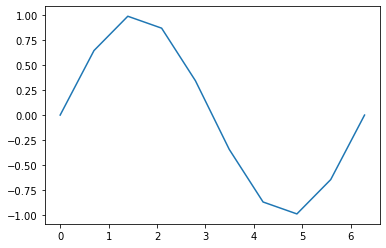

In [107]:
plt.plot(a, b)
plt.show() # 正弦图

In [108]:
# 查看plot的功能
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

In [109]:
# 更密集的数据点
x = np.linspace(0, 2 * np.pi, 50)
x

array([0.        , 0.12822827, 0.25645654, 0.38468481, 0.51291309,
       0.64114136, 0.76936963, 0.8975979 , 1.02582617, 1.15405444,
       1.28228272, 1.41051099, 1.53873926, 1.66696753, 1.7951958 ,
       1.92342407, 2.05165235, 2.17988062, 2.30810889, 2.43633716,
       2.56456543, 2.6927937 , 2.82102197, 2.94925025, 3.07747852,
       3.20570679, 3.33393506, 3.46216333, 3.5903916 , 3.71861988,
       3.84684815, 3.97507642, 4.10330469, 4.23153296, 4.35976123,
       4.48798951, 4.61621778, 4.74444605, 4.87267432, 5.00090259,
       5.12913086, 5.25735913, 5.38558741, 5.51381568, 5.64204395,
       5.77027222, 5.89850049, 6.02672876, 6.15495704, 6.28318531])

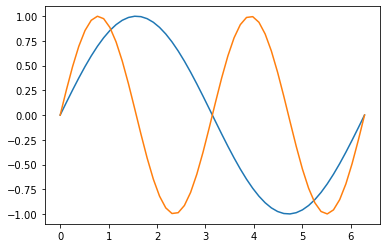

In [110]:
# 画出多条数据线：
plt.plot(x, np.sin(x), x, np.sin(2 * x))
plt.show()

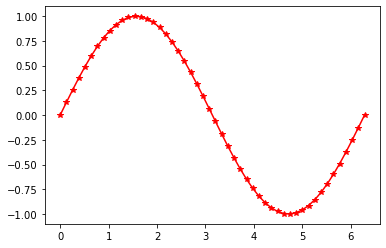

In [111]:
# 使用字符串，给定线条参数：
plt.plot(x, np.sin(x), 'r-*')
plt.show()

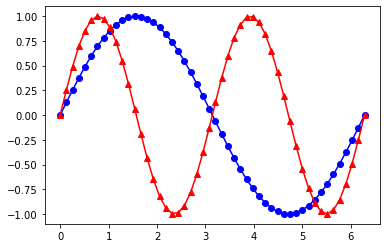

In [112]:
# 多线条：
plt.plot(x, np.sin(x), 'b-o', x, np.sin(2 * x), 'r-^')
plt.show()

在图中添加标签

C:\Users\36124\AppData\Local\Temp/ipykernel_20008/2068036237.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(t, x, 'bo', t, np.sin(2 * t), 'r-^', label='sin', color='red', )
C:\Users\36124\AppData\Local\Temp/ipykernel_20008/2068036237.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-^" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t, x, 'bo', t, np.sin(2 * t), 'r-^', label='sin', color='red', )


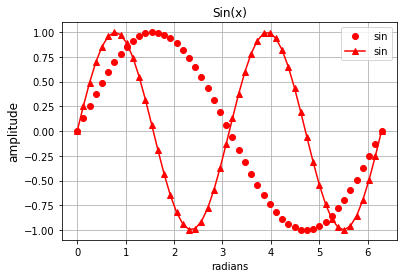

In [113]:
t = np.linspace(0, 2 * np.pi, 50)
x = np.sin(t)
plt.plot(t, x, 'bo', t, np.sin(2 * t), 'r-^', label='sin', color='red', )
plt.legend()
plt.xlabel('radians')
plt.ylabel('amplitude', fontsize='large')
plt.title('Sin(x)')
plt.grid()
plt.show()

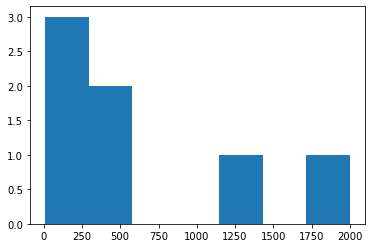

In [114]:
# 直方图
data = np.array([1234, 321, 400, 120, 11, 30, 2000])
plt.hist(data, 7)
plt.show()

## 17 pandas 模块 

Pandas是Python的一个用于数据分析的库： http://pandas.pydata.org  
基于NumPy,SciPy的功能，在其上补充了大量的数据操作（Data Manipulation）功能。  
统计、分组、排序、透视表自由转换

普通的数据读取

In [115]:
iris_file = './data/iris.data.txt'

In [116]:
with open(iris_file, 'r', encoding='utf-8') as f:
    lines = f.readlines()

for idx, line in enumerate(lines):
    print(line)
    if idx == 10:
        break

5.1,3.5,1.4,0.2,Iris-setosa

4.9,3.0,1.4,0.2,Iris-setosa

4.7,3.2,1.3,0.2,Iris-setosa

4.6,3.1,1.5,0.2,Iris-setosa

5.0,3.6,1.4,0.2,Iris-setosa

5.4,3.9,1.7,0.4,Iris-setosa

4.6,3.4,1.4,0.3,Iris-setosa

5.0,3.4,1.5,0.2,Iris-setosa

4.4,2.9,1.4,0.2,Iris-setosa

4.9,3.1,1.5,0.1,Iris-setosa

5.4,3.7,1.5,0.2,Iris-setosa



使用pandas进行数据读取

In [117]:
import numpy as np
import scipy as sp
import pandas as pd

data = pd.read_csv(iris_file, header=None, encoding='utf-8')
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


快速的操作元数据

In [118]:
cnames = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data.columns = cnames
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


快速过滤

In [119]:
data[data['petal_width'] == data.petal_width.max()]

,sepal_length,sepal_width,petal_length,petal_width,class
100,6.3,3.3,6.0,2.5,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica


快速切片

In [120]:
data.iloc[::30, :2]

,sepal_length,sepal_width
0,5.1,3.5
30,4.8,3.1
60,5.0,2.0
90,5.5,2.6
120,6.9,3.2


快速统计

In [121]:
data['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [122]:
for x in range(4):
    s = data.iloc[:,x]
    print('{0:<12}'.format(s.name), " Statistics: ",
    '{0:>5}  {1:>5}  {2:>5}  {3:>5}'.format(s.max(), s.min(), round(s.mean(),2),round(s.std(),2)))

sepal_length  Statistics:    7.9    4.3   5.84   0.83
sepal_width   Statistics:    4.4    2.0   3.05   0.43
petal_length  Statistics:    6.9    1.0   3.76   1.76
petal_width   Statistics:    2.5    0.1    1.2   0.76


快速“MapReduce”

In [123]:
slogs = lambda x:np.log(x)*x
entpy = lambda x:np.exp((slogs(x.sum())-x.map(slogs).sum())/x.sum())
data.groupby('class').agg(entpy)

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,49.878745,49.695242,49.654909,45.810069
Iris-versicolor,49.815081,49.680665,49.694505,49.452305
Iris-virginica,49.772059,49.714500,49.761700,49.545918


按照`'class'`列进行分组，并对每个分组应用`entpy`函数进行聚合操作。换句话说，它计算了每个类别的信息熵。

### Pandas的重要数据类型

- DataFrame(二维表)
- Series(一维序列)
- Index(行索引，行级元数据)

**Series**

数据世界中对于任意一个个体的全面观测，或者对于任意一组个体某一属性的观测，全部可以抽象为Series的概念。

用值构建一个Series：

由默认index和values组成。

In [124]:
series1 = pd.Series(np.random.randn(4))
series1

0    1.188933
1   -0.150223
2    1.250500
3   -0.952842
dtype: float64

In [125]:
print(type(series1))
print(series1.index)
print(series1.values)

<class 'pandas.core.series.Series'>
RangeIndex(start=0, stop=4, step=1)
[ 1.1889329  -0.15022274  1.25049977 -0.95284222]


Series支持过滤的原理就如同NumPy：

In [126]:
series1 > 0

0     True
1    False
2     True
3    False
dtype: bool

In [127]:
series1[series1 > 0]

0    1.188933
2    1.250500
dtype: float64

当然也支持Broadcasting：

In [128]:
series1*2

0    2.377866
1   -0.300445
2    2.501000
3   -1.905684
dtype: float64

In [129]:
series1+5

0    6.188933
1    4.849777
2    6.250500
3    4.047158
dtype: float64

以及Universal Function：

In [130]:
print(series1)
print(np.exp(series1))

#NumPy Universal Function
f_np = np.frompyfunc(lambda x:np.exp(x*2 + 5), 1, 1)
f_np(series1)

0    1.188933
1   -0.150223
2    1.250500
3   -0.952842
dtype: float64
0    3.283575
1    0.860516
2    3.492088
3    0.385643
dtype: float64


0    1600.171052
1     109.898203
2    1809.850532
3      22.072126
dtype: object

在序列上就使用行标，而不是创建一个2列的数据表，能够轻松辨别哪里是数据，哪里是元数据：

In [131]:
series2 = pd.Series(series1.values, index=['norm_' + str(i) for i in range(4)])
print(series2, type(series2))
print(series2.index)
print(type(series2.index))
print(series2.values)
series2

norm_0    1.188933
norm_1   -0.150223
norm_2    1.250500
norm_3   -0.952842
dtype: float64 <class 'pandas.core.series.Series'>
Index(['norm_0', 'norm_1', 'norm_2', 'norm_3'], dtype='object')
<class 'pandas.core.indexes.base.Index'>
[ 1.1889329  -0.15022274  1.25049977 -0.95284222]


norm_0    1.188933
norm_1   -0.150223
norm_2    1.250500
norm_3   -0.952842
dtype: float64

虽然行是有顺序的，但是仍然能够通过行级的index来访问到数据：

（当然也不尽然像Ordered Dict，因为行索引甚至可以重复，不推荐重复的行索引不代表不能用）

In [132]:
series2[['norm_0','norm_3']]

norm_0    1.188933
norm_3   -0.952842
dtype: float64

In [133]:
'norm_0' in series2

True

In [134]:
'norm_6' in series2

False

默认行索引就像行号一样：

In [135]:
series1.index

RangeIndex(start=0, stop=4, step=1)

从Key不重复的Ordered Dict或者从Dict来定义Series就不需要担心行索引重复：

In [136]:
s_dict = {"Japan":"Tokyo", "Korea":"Seoul", "China":"Beijing"}
series3 = pd.Series(s_dict)

print(series3.index)
print(series3.values)
series3

Index(['Japan', 'Korea', 'China'], dtype='object')
['Tokyo' 'Seoul' 'Beijing']


Japan      Tokyo
Korea      Seoul
China    Beijing
dtype: object

与Dict区别一： 有序

In [137]:
lst = ["Japan", "China", "Singapore", "Korea"]
series4 = pd.Series(s_dict, index =lst)
series4

Japan          Tokyo
China        Beijing
Singapore        NaN
Korea          Seoul
dtype: object

In [138]:
print(series4.values)
print(series4.index)
print(series4.isnull())
print(series4.notnull())

['Tokyo' 'Beijing' nan 'Seoul']
Index(['Japan', 'China', 'Singapore', 'Korea'], dtype='object')
Japan        False
China        False
Singapore     True
Korea        False
dtype: bool
Japan         True
China         True
Singapore    False
Korea         True
dtype: bool


与Dict区别二： index内值可以重复，尽管不推荐。

In [139]:
lst = ['A', 'B', 'B', 'C']
series5 = pd.Series(series1.values, index=lst)
series5

A    1.188933
B   -0.150223
B    1.250500
C   -0.952842
dtype: float64

In [140]:
series5[['B', 'A']]

B   -0.150223
B    1.250500
A    1.188933
dtype: float64

整个序列级别的元数据信息：name

当数据序列以及index本身有了名字，就可以更方便的进行后续的数据关联啦！

In [141]:
series4.name

In [142]:
series4.index.name

In [143]:
series4.name = "Capital Series"
series4.index.name = "Nation"
series4

Nation
Japan          Tokyo
China        Beijing
Singapore        NaN
Korea          Seoul
Name: Capital Series, dtype: object

In [144]:
pd.DataFrame(series4)

,Capital Series
Nation,
Japan,Tokyo
China,Beijing
Singapore,NaN
Korea,Seoul


**DataFrame**

Series的有序集合，就像R的DataFrame一样方便。

仔细想想，绝大部分的数据形式都可以表现为DataFrame。

从Numpy二维数组、从文件或者从数据库定义：数据虽好，勿忘列名

In [145]:
data_np = np.asarray([('Japan', 'Tokyo', 4000),
                      ('Korea', 'Seoul', 1300),
                      ('China', 'Beijing', 9100)])
df1 = pd.DataFrame(data_np, columns=['nation','capital','GDP'])
df1

,nation,capital,GDP
0,Japan,Tokyo,4000
1,Korea,Seoul,1300
2,China,Beijing,9100


等长的列数据保存在一个字典里（JSON）：很不幸，字典key是无序的

In [146]:
data_dict = {'nation': ['Japan', 'Korea', 'China'],
             'capital': ['Tokyo', 'Seoul', 'Beijing'],
             'GDP': [4900, 1300, 9100]}
df2 = pd.DataFrame(data_dict)
df2

,nation,capital,GDP
0,Japan,Tokyo,4900
1,Korea,Seoul,1300
2,China,Beijing,9100


从另一个DataFrame定义DataFrame

In [147]:
df21 = pd.DataFrame(df2, columns=['nation', 'capital', 'GDP'])
df21

,nation,capital,GDP
0,Japan,Tokyo,4900
1,Korea,Seoul,1300
2,China,Beijing,9100


In [148]:
df22 = pd.DataFrame(df2, columns=['nation', 'capital', 'GDP'], index = [2, 0, 1])
df22

,nation,capital,GDP
2,China,Beijing,9100
0,Japan,Tokyo,4900
1,Korea,Seoul,1300


从DataFrame中取出列？两种方法  
- '.'的写法容易与其他预留关键字产生冲突
- '[ ]'的写法最安全。

In [149]:
print(df22.nation)
print(df22.capital)
print(df22['GDP'])

2    China
0    Japan
1    Korea
Name: nation, dtype: object
2    Beijing
0      Tokyo
1      Seoul
Name: capital, dtype: object
2    9100
0    4900
1    1300
Name: GDP, dtype: int64


In [150]:
df22['capital']

2    Beijing
0      Tokyo
1      Seoul
Name: capital, dtype: object

从DataFrame中取出行

In [151]:
df22[0:1] # 给出的实际是DataFrame

,nation,capital,GDP
2,China,Beijing,9100


In [152]:
df22.iloc[0] # 通过对应Index给出行

nation       China
capital    Beijing
GDP           9100
Name: 2, dtype: object

像Numpy切片一样的：iloc

In [153]:
df22.iloc[0,:]

nation       China
capital    Beijing
GDP           9100
Name: 2, dtype: object

In [154]:
df22.iloc[:,0]

2    China
0    Japan
1    Korea
Name: nation, dtype: object

然而动态增加列无法用"."的方式完成，只能用"[ ]"

In [155]:
df22['population'] = [1600, 130, 55]
df22['region'] = 'East_Asian'
df22

,nation,capital,GDP,population,region
2,China,Beijing,9100,1600,East_Asian
0,Japan,Tokyo,4900,130,East_Asian
1,Korea,Seoul,1300,55,East_Asian
